In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('no_long_lat_nulls_2023.csv')
df.head()

,Month,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,2023-01,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,Not documented
1,2023-01,Avon and Somerset Constabulary,-2.491146,51.425008,On or near Maximus Gardens,E01014399,Bath and North East Somerset 001A,Drugs,Unable to prosecute suspect
2,2023-01,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Drugs,Unable to prosecute suspect
3,2023-01,Avon and Somerset Constabulary,-2.509285,51.409716,On or near Barnard Walk,E01014399,Bath and North East Somerset 001A,Vehicle crime,Status update unavailable
4,2023-01,Avon and Somerset Constabulary,-2.509285,51.409716,On or near Barnard Walk,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Offender given a caution


# Preproccessing


encoding month to a number rather than string to be able to use it easily


In [3]:
df['Month'] = pd.to_datetime(df['Month']).dt.month


In [4]:
df.head()

,Month,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,1,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,Not documented
1,1,Avon and Somerset Constabulary,-2.491146,51.425008,On or near Maximus Gardens,E01014399,Bath and North East Somerset 001A,Drugs,Unable to prosecute suspect
2,1,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Drugs,Unable to prosecute suspect
3,1,Avon and Somerset Constabulary,-2.509285,51.409716,On or near Barnard Walk,E01014399,Bath and North East Somerset 001A,Vehicle crime,Status update unavailable
4,1,Avon and Somerset Constabulary,-2.509285,51.409716,On or near Barnard Walk,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Offender given a caution


Checking out the crime type values to see if we can merge some values with each other

In [5]:
original_counts = df['Crime type'].value_counts()
print(original_counts)

Crime type
Violence and sexual offences    2054511
Anti-social behaviour            933049
Other theft                      468262
Criminal damage and arson        467059
Public order                     458084
Shoplifting                      405187
Vehicle crime                    363321
Burglary                         249092
Drugs                            161311
Theft from the person            115645
Other crime                      106409
Robbery                           73724
Bicycle theft                     64489
Possession of weapons             52859
Name: count, dtype: int64


In [6]:
#Seeing the value counts if we merge them
categories = {
    'Violent Crimes': ['Violence and sexual offences', 'Robbery', 'Possession of weapons'],
    'Property Crime': ['Burglary', 'Vehicle crime', 'Other theft', 'Theft from the person', 'Shoplifting', 'Bicycle theft'],
    'Public Order and Safety': ['Anti-social behaviour', 'Public order', 'Criminal damage and arson'],
    'Drug-related Crimes': ['Drugs'],
    'Other Crimes': ['Other crime']
}
new_counts = {category: 0 for category in categories}

for category, crime_types in categories.items():
    for crime_type in crime_types:
        new_counts[category] += original_counts.get(crime_type, 0)

for category, count in new_counts.items():
    print(f'{category}: {count}')

Violent Crimes: 2181094
Property Crime: 1665996
Public Order and Safety: 1858192
Drug-related Crimes: 161311
Other Crimes: 106409


In [7]:
for category, crime_types in categories.items():
    df.loc[df['Crime type'].isin(crime_types), 'Crime type'] = category
df['Crime type'].value_counts()

Crime type
Violent Crimes             2181094
Public Order and Safety    1858192
Property Crime             1665996
Drug-related Crimes         161311
Other Crimes                106409
Name: count, dtype: int64

These counts look way more balanced and manageable to predict, I will do the scatter plot of longitude and latitude coloured by crime type again to visualize it better

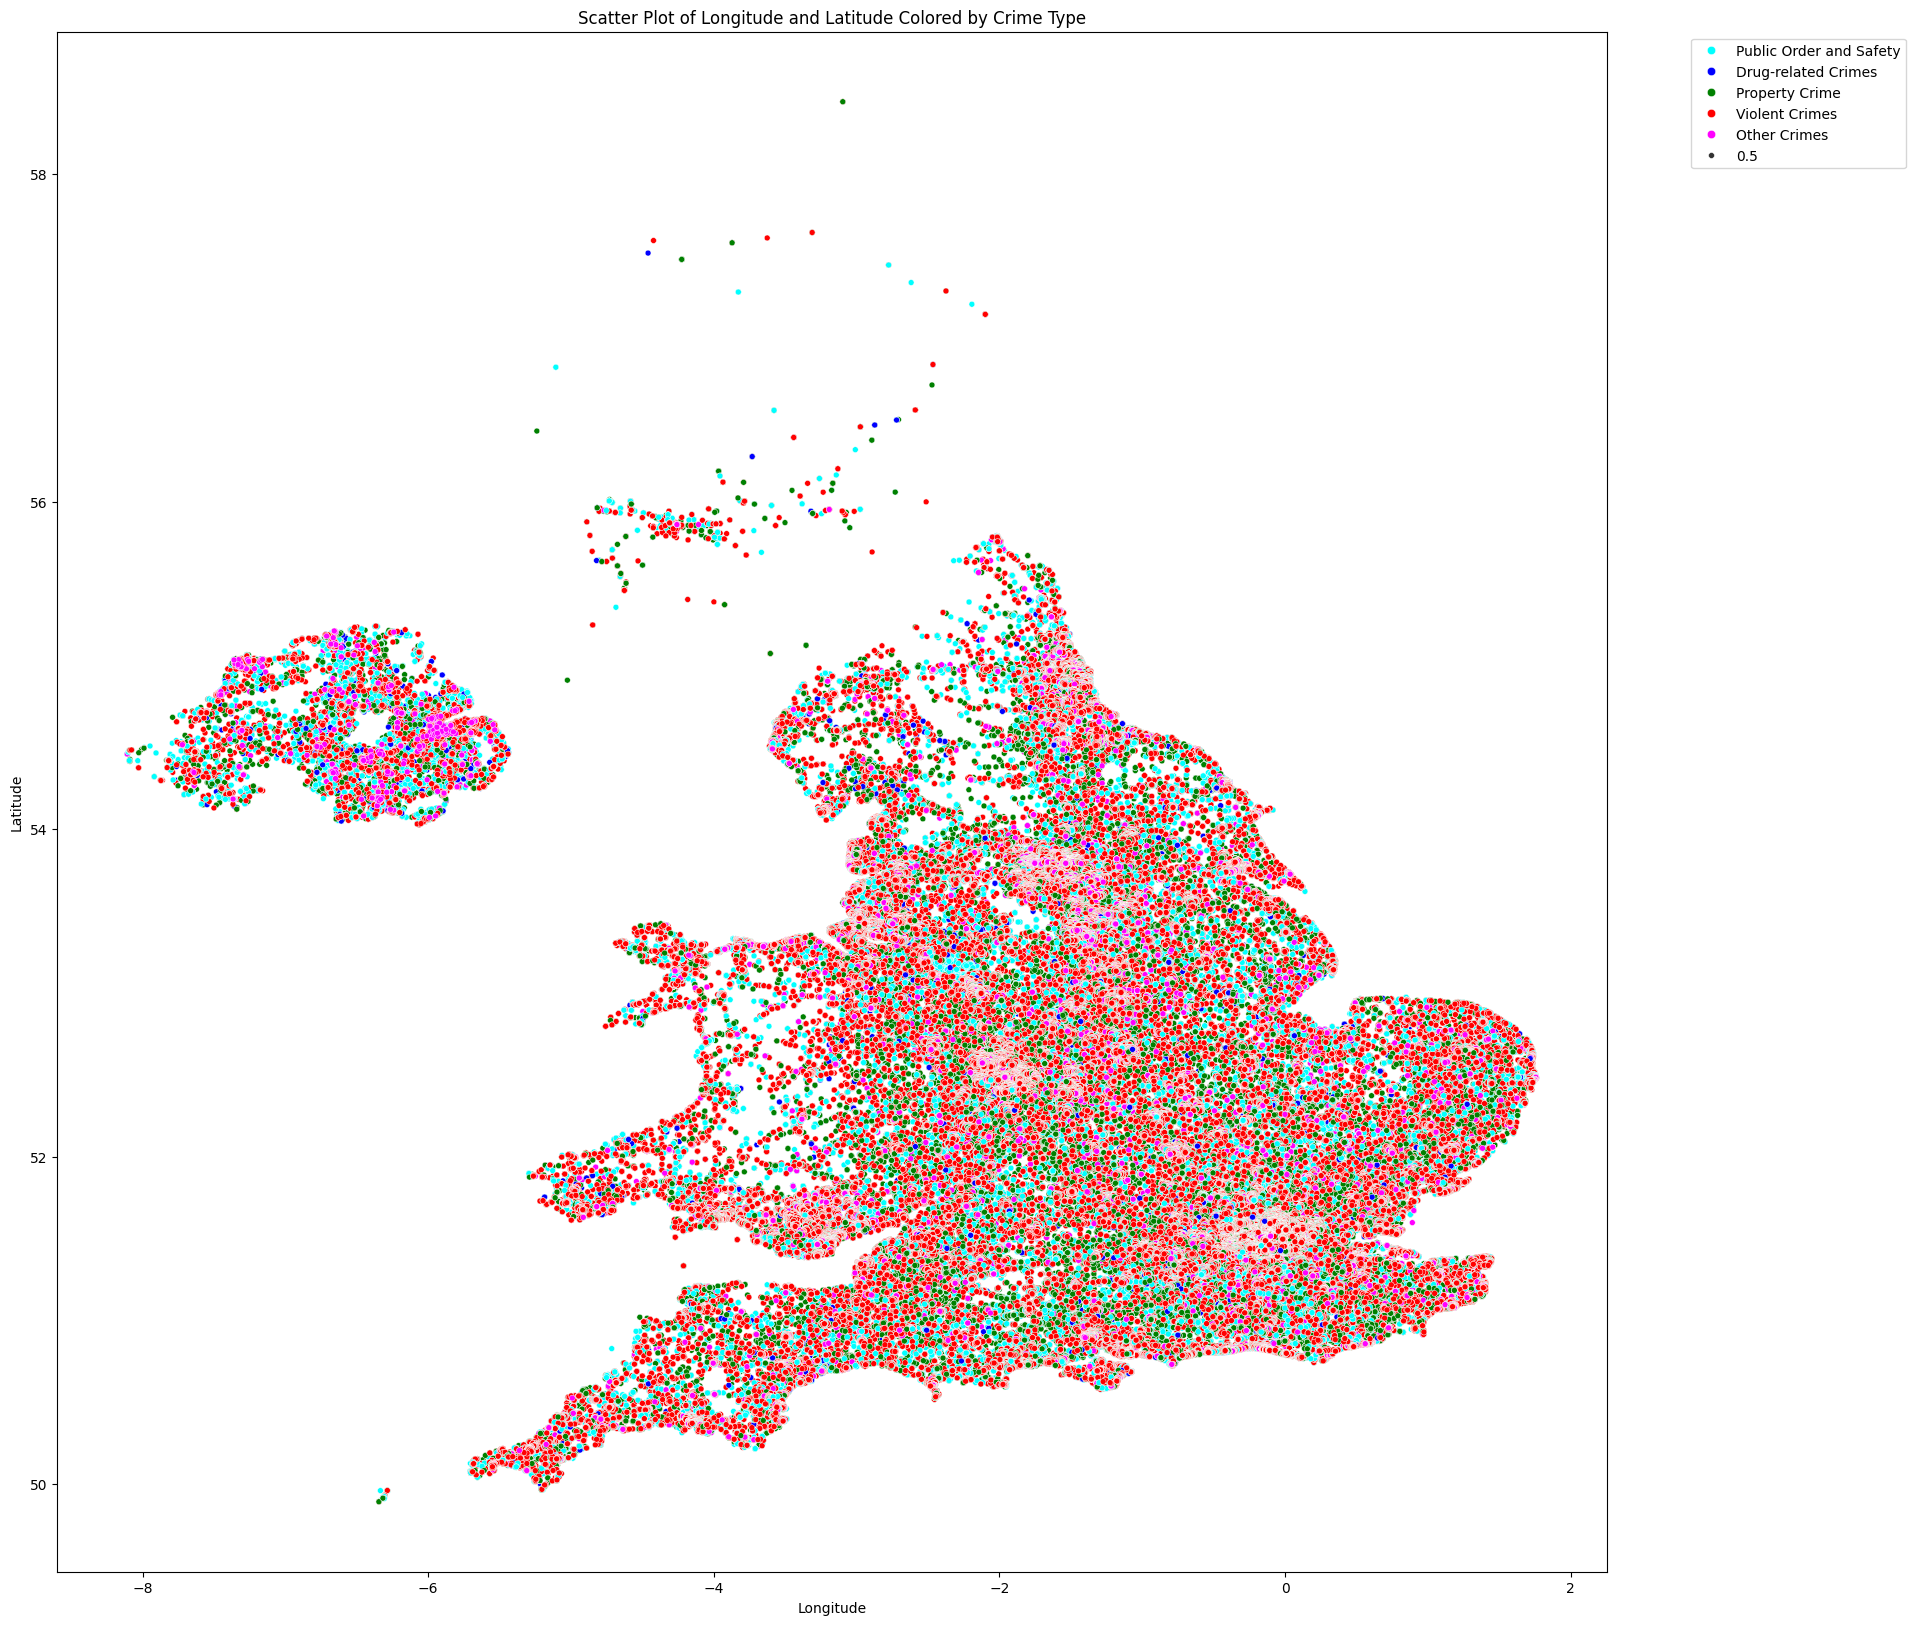

In [8]:
crime_type_colors = {
    'Violent Crimes': 'red',
    'Property Crime': 'green',
    'Public Order and Safety': 'cyan',
    'Drug-related Crimes': 'blue',
    'Other Crimes': 'magenta',
}
plt.figure(figsize=(20, 20))  
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Crime type', size=0.5,palette=crime_type_colors)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude and Latitude Colored by Crime Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()

In [9]:
X = df[['Latitude', 'Longitude']]
y = df['Crime type']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 (KNN) algorithm

In [10]:

k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)

# Predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

    Drug-related Crimes       0.14      0.07      0.10     32182
           Other Crimes       0.14      0.04      0.07     21292
         Property Crime       0.46      0.55      0.50    334126
Public Order and Safety       0.42      0.44      0.43    371274
         Violent Crimes       0.49      0.44      0.46    435727

               accuracy                           0.45   1194601
              macro avg       0.33      0.31      0.31   1194601
           weighted avg       0.45      0.45      0.45   1194601



In [11]:

k = 10 
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)

# Predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

    Drug-related Crimes       0.21      0.05      0.07     32182
           Other Crimes       0.25      0.03      0.05     21292
         Property Crime       0.50      0.53      0.51    334126
Public Order and Safety       0.44      0.44      0.44    371274
         Violent Crimes       0.49      0.52      0.50    435727

               accuracy                           0.47   1194601
              macro avg       0.38      0.31      0.32   1194601
           weighted avg       0.46      0.47      0.47   1194601



In [12]:
k = 20
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)

# Predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

    Drug-related Crimes       0.30      0.03      0.05     32182
           Other Crimes       0.37      0.02      0.03     21292
         Property Crime       0.52      0.51      0.51    334126
Public Order and Safety       0.44      0.42      0.43    371274
         Violent Crimes       0.48      0.56      0.52    435727

               accuracy                           0.48   1194601
              macro avg       0.42      0.31      0.31   1194601
           weighted avg       0.47      0.48      0.47   1194601



In [13]:
k = 80
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)

# Predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

    Drug-related Crimes       0.37      0.01      0.02     32182
           Other Crimes       0.39      0.02      0.03     21292
         Property Crime       0.51      0.47      0.49    334126
Public Order and Safety       0.43      0.36      0.39    371274
         Violent Crimes       0.46      0.60      0.52    435727

               accuracy                           0.47   1194601
              macro avg       0.43      0.29      0.29   1194601
           weighted avg       0.46      0.47      0.45   1194601



In [14]:
k = 300
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)

# Predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

    Drug-related Crimes       0.43      0.00      0.01     32182
           Other Crimes       0.40      0.01      0.01     21292
         Property Crime       0.47      0.41      0.44    334126
Public Order and Safety       0.41      0.32      0.36    371274
         Violent Crimes       0.44      0.62      0.51    435727

               accuracy                           0.44   1194601
              macro avg       0.43      0.27      0.27   1194601
           weighted avg       0.44      0.44      0.42   1194601



Decision Trees

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the Decision Tree classifier
decision_tree_classifier.fit(X_train, y_train)

# Predictions on the testing set
y_pred_decision_tree = decision_tree_classifier.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_decision_tree))

Decision Tree Classifier:
                         precision    recall  f1-score   support

    Drug-related Crimes       0.16      0.06      0.09     32182
           Other Crimes       0.12      0.05      0.07     21292
         Property Crime       0.51      0.56      0.53    334126
Public Order and Safety       0.46      0.44      0.45    371274
         Violent Crimes       0.51      0.53      0.52    435727

               accuracy                           0.49   1194601
              macro avg       0.35      0.33      0.33   1194601
           weighted avg       0.48      0.49      0.48   1194601



Random Forests


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(class_weight='balanced')

# Train the Random Forest classifier
random_forest_classifier.fit(X_train, y_train)

# Predictions on the testing set
y_pred_random_forest = random_forest_classifier.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_random_forest))

KeyboardInterrupt: 

Support Vector Machines (SVM)


In [16]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC(class_weight='balanced')

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predictions on the testing set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
print("Support Vector Machine (SVM) Classifier:")
print(classification_report(y_test, y_pred_svm))

New model using the month in addition to longitude and latitude

In [15]:
features = ['Longitude', 'Latitude', 'Month']  # Add additional features here
target = 'Crime type'
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)


In [16]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the Decision Tree classifier
decision_tree_classifier.fit(X_train, y_train)

# Predictions on the testing set
y_pred_decision_tree = decision_tree_classifier.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_decision_tree))

Decision Tree Classifier:
                         precision    recall  f1-score   support

    Drug-related Crimes       0.13      0.14      0.13     32182
           Other Crimes       0.09      0.10      0.10     21292
         Property Crime       0.47      0.55      0.51    334126
Public Order and Safety       0.44      0.44      0.44    371274
         Violent Crimes       0.51      0.45      0.48    435727

               accuracy                           0.46   1194601
              macro avg       0.33      0.33      0.33   1194601
           weighted avg       0.46      0.46      0.46   1194601

